In [ ]:
from pymystem3 import Mystem

m_stem = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [173]:
with open('raw_text.txt', 'r') as f:
    texts = f.read().splitlines()

In [174]:
def annotating(texts):
    """
    params: list of raw sentences
    ---
    returns: list of annotated sentences
    """
    annotated = []
    pos_list = ["–"]

    for sent in texts:
        annotation = []
        ana = m_stem.analyze(sent)
        new_d = []

        for an in ana:
            if 'analysis' in an and an['analysis'] != []:
                gr = an['analysis'][0]['gr']
                pos = gr.split('=')[0].split(',')[0]
                if pos == 'V':
                    if 'прич' in gr.split('=')[1]:
                        pos = 'PARTCP'
                    elif 'деепр' in gr.split('=')[1]:
                        pos = 'GER'

                lemma = an['analysis'][0]['lex']
                annotation.append(f'{lemma}+{pos}')
                if pos not in pos_list:
                    pos_list.append(pos)
            elif 'analysis' not in an:
                pass
            else:
                # for unknown words put token '–'
                annotation.append('–')
        annotated.append(' '.join(annotation))

    return annotated, pos_list

In [175]:
annotated_data = annotating(texts)

In [106]:
with open('annotated_text.txt', 'w') as f:
    for element in annotated_data[0]:
        f.write(element)
        f.write('\n')

In [176]:
pos_list = annotated_data[1]

In [177]:
pos_count = dict()
for pos in pos_list:
    pos_count[pos] = ' '.join(annotated_data[0]).count(pos)
pos_count = dict(sorted(pos_count.items(), key=lambda item: item[1], reverse=True))

In [178]:
import re

def prepare_query(query):
    """
    params: string of query
    ---
    returns: query in ideal format and words which were given in ""
    """
    if len(query) == 0:
        return "Неверный ввод: пустая строка"
    elif not re.fullmatch(r'[а-яA-Zё\s\+"]+', query):
        return "Неверный ввод: запрещённые символы"
    ideal_query = []
    to_remember = []
    for token in query.split():
        if '+' in token:
            if any(len(i) == 0 for i in token.split('+')):
                return 'Неверный ввод: введите лемму и часть речи'
            if not token.split('+')[0].islower():
                return 'Неверный ввод: леммы и словоформы должны быть в нижнем регистре'
            pos = token.split('+')[1]
            if pos.isupper() and pos in pos_list:
                ideal_query.append([token])
            else:
                return 'Неверный ввод: несуществующая часть речи'
        elif token.isupper():
            if token in pos_list:
                ideal_query.append([token])
            else:
                return 'Неверный ввод: несуществующая часть речи'
        else:
            if '"' in token:
                if token.count('"') == 2:
                    if not token.islower():
                        return 'Неверный ввод: леммы и словоформы должны быть в нижнем регистре'
                    else:
                        to_remember.append(token.strip('"'))
                else:
                    return 'Неверный ввод: одиночные кавычки'
            ideal_query.append(annotating([token.strip('"')])[0])

    return ideal_query, to_remember

In [181]:
def matches_token(sent_token, ideal_token):
    """
    params: token in annotated sentence, and token in ideal query
    ---
    returns: True id tokens are identical
    """
    if ideal_token[0].isupper():
        return sent_token.endswith(f'+{ideal_token[0]}')
    return sent_token == ideal_token[0]

In [185]:
def search_func(query):
    """
    params: query
    ---
    returns: sentences which satisfy query
    """
    ideal_query, to_remember = prepare_query(query)

    ideal_query, to_remember = prepare_query(query)
    len_q = len(ideal_query)
    result = []
    with open('annotated_text.txt', 'r') as file:
        lines = file.read().splitlines()

    with open('raw_text.txt', 'r') as file:
        raw_texts = file.read().splitlines()

    for i, sent in enumerate(lines):
        if all(item in raw_texts[i] for item in to_remember):
            first = ideal_query[0][0]
            indexes = [ind for ind, val in enumerate(sent.split()) if val == first or val.endswith(first)]

            for element in indexes:
                if element + len_q > len(sent.split()):
                    continue

                sent_to_check = sent.split()[element:element + len_q]
                if all(matches_token(sent_to_check[num], ideal_query[num]) for num in range(len_q)):
                    result.append(raw_texts[i])
                    break

    return '\n'.join(result)

In [186]:
print(search_func('таро V'))

бабулька по таро гадает на арбате, все сходится стоит р
Ешка, таро дают ответ на конкретный вопрос- скоро ли- не дают.
Таро,погадайте,я переписываюсь с иностранцем.
Наверное еще нельзя на таро предсказывать поэтому нет никого.
ТАРО показывают дорогу и то что на дороге может случиться - а вот тут уже вы вибираете - пойдёте вы пешком, побежите либо просто пойдёте с остановками.
Если у кого ко мне есть вопроспо таро - слушаю.


In [187]:
print(search_func('не A'))

блин, а мне перед новым годом гадали на таро, все сбывается( девушка с таким сожаление мне гадостей пообещала, я не поверила ни слову, настолько это было не похоже на правду
Или я не права?
Понять до конца тем,кто не связан с магией все равно нельзя.
Мандаринка а что за ритуал, уж не черная ли тут магия?
Может вы сможете посмотреть как сложатся отношения с мужем, мы еще не женаты, но живем вместе уже долго.
Вы как - то не готовы?
они же не благотворительная организация
типа не готов ну еще че нибудь там
Если скажет тебе "да" - обнадежит и возьмет на себя обязательства (к чему не готов он.
Овен не уверен на счёт будущего с вами никак.
но парень в вас не уверен вообще.
кому ж не нужна конкретика.
но точно не скажу - не сильна в производителях жвачек
Потому не интересны.
Вам нужна семья, прочная любовь (а кому это не нужно?
мне расклады на таро не нужны
ну почти Топотулина, переживать, за меня не надо, мне ваш Валуев не нужен.
Лека, ну если её Валуев не нужен, так мы его себе оставим, нам

лема без pos, лемма+pos

In [188]:
print(search_func('не быть+V'))

Хорошо, больше не буду,темболее, я обещала, что это последний вопрос
Как раньше- не будет.
не было возможности:(
можно подумать, если его не будет все дружно заметят и зааплодируют что у вас там кг нету одного согнали.
Раскладывать никому не буду, противно после вчерашнего
Ятак, счас вопрос задам - не было ли подставы какой в виде кражи писем или документов?
Таро давно не было.
Ничего особо интересного для вас не будет но и ничего плохого
ТАКОМУ количеству народа уже ситуации рассматривали, что если бы они не были профи своего дела, ветка давно бы загнулась под жалобами и 'наездами' по поводу несбывшихся прогнозов
Мейн а как их растить если их ну нет изначально , нет взаимности , не будешь же мил насильно
больше не буду!
(это я не про внешность, я про отношение, чувства с ее стороны, которых не было.
Потому что прекрасно понимает - с той у него ничего не будет кроме страданий, а с Вами будет спокойно.
Если еще ни один мужчина не мучился от любви к Вам, то не один и не будет мучаться.
К

словоформа

In [189]:
print(search_func('"скажите"'))

скажите вопрос- погадаю
Милагрос, у меня еще один вопрос ответьте плиз : я завтра собираюсь в компанию где работает мой МЧ- скажите встретимся мы или нет?
МЧ- скажите встретимся мы или нет?
Марька, не видать такого М тогда скажите, мой мч мну любит и поедем ли мы с ним отдыхать вскоре?
Вы хоть скажите похоже на правду или нет?
Мила скажите а можно гороскопам доверять - когда пишут, что для таких то знаков - такие то профессии ?
Мейн,скажите пожалуйста,сегодня у меня был небольшой конфликт с подругой,как дальше будут развиватся наши отношения?
Мила или Мейн,скажите пожалуйста,сегодня у меня был небольшой конфликт с подругой,как дальше будут развиватся наши отношения?
Мейн, скажите, пож.
Еще вопрос скажите а какой колодой надо пользоваться.
скажите, а ритуалы правда помогают?
Мио, здрасти, скажите, будет ли у меня еще встреча с задуманным МЧ, спасибо
Мио, скажите, а Лев хочет возобновить эти отношения?
Мио, а про чувства моего мужчины мне скажите?
скажите пожалуйста, что с этим человеком

In [190]:
print(search_func('"гадать" PR'))

Скажте а гадать на таро это нужно иметь особый дар или может при желании научиться любой человек?


лемма

In [191]:
print(search_func('сказать'))

скажите вопрос- погадаю
не могли бы Вы мне сказать, забеременею ли я в  году?
Светлана, я просто сказала Вам, что выпало.
Амне вы можете мне сказать, если не сложно,
Cкажите ,как есть.
не могу сказать.
Милагрос, у меня еще один вопрос ответьте плиз : я завтра собираюсь в компанию где работает мой МЧ- скажите встретимся мы или нет?
- скажем так.
МЧ- скажите встретимся мы или нет?
(ну тарологи поймут о чем я - так вот предпочитаю сказать - что у вас видимо в ближайшее время какая-то радость.
Вы правы, я знаю об этом, т.к. сама ему сказала о своей неуверенности в нем.
Скажите пожалуйста, будет ли у меня счастливая любовь когда-нибудь?
М, можете мне что-нибудь сказать на мой вопрос о моей личной жизни?
Марька, не видать такого М тогда скажите, мой мч мну любит и поедем ли мы с ним отдыхать вскоре?
Вы хоть скажите похоже на правду или нет?
Мила скажите а можно гороскопам доверять - когда пишут, что для таких то знаков - такие то профессии ?
Мейн,скажите пожалуйста,сегодня у меня был небольш

pos дом

In [192]:
print(search_func('A дом'))

Пророчество, дело в том, что я жду очень важный ответ из казенного дома.


In [193]:
print(search_func('S V ADV'))

карты говорят- нужно изображать дурочку- говорить -да, дорогой, -а делать, как считаешь нужным.
карты о твоем сомнении говорят больше, чем о его.
-ой суммой,у мня плохое предчувтвие,а заплатить надо(выборы-неработаета переплачивать  неохота!
танюшка, лучше с родителями быть опять игнор.
а меня любят, меня мой кот любит, щас помурлыкал мне :
Если что - его в форточку выкинуть можно
Человек, рожденный под знаком Овна, зовет замуж.
Леска, будете немного похитрее и останетесь вместе.
М, все выходные устраивала разборки с подругой, она вопреки моим мольбам общается по-дружески с человеком которого я очень люблю, а он относится ко мне как друг, говорит так.
Если кто из тарологов появится сегодня - пожалуйста, ответьте на мой вопрос.
Я так надеялась что ктото появится сегодня и погадает.
Ато сижу уже с утра жду кто посмотрит.
Могу сказать что чистка дает правда \% результат.
карты показали рядом  молодых человека, с одним возможны отношения, с другим наоборот не стоит их заводить.
Мисс, лазер

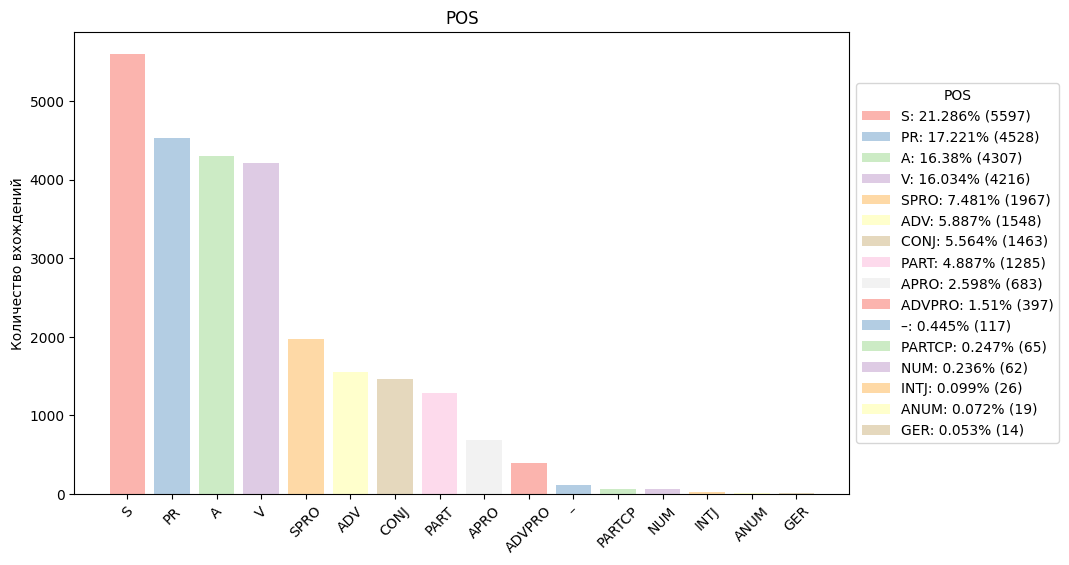

In [166]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
labels = [f"{pos}: {np.round((pos_count[pos] / sum(pos_count.values()) * 100), 3)}% ({pos_count[pos]})" for pos in pos_count.keys()]

ax.bar(pos_count.keys(), pos_count.values(), label=labels, color=plt.get_cmap('Pastel1').colors)

ax.set_ylabel('Количество вхождений')
ax.set_title('POS')
ax.legend(title='POS', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.xticks(rotation=45)

plt.savefig('bar.png',  bbox_inches = 'tight')
plt.show()

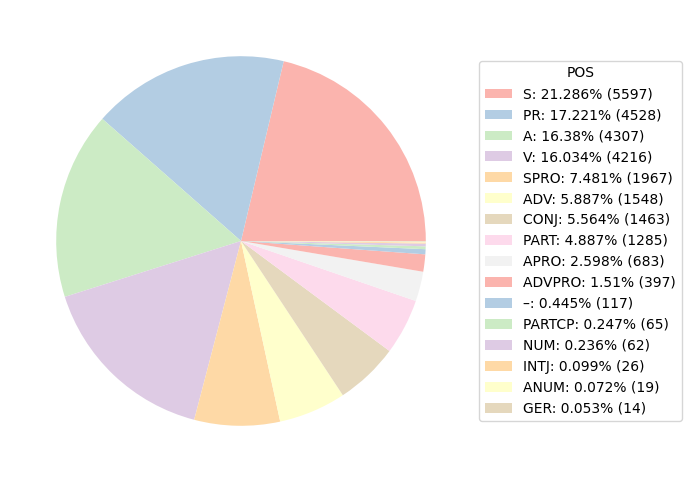

In [167]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

labels = [f"{pos}: {np.round((pos_count[pos] / sum(pos_count.values()) * 100), 3)}% ({pos_count[pos]})" for pos in pos_count.keys()]

wedges, texts = ax.pie(pos_count.values(), colors=plt.get_cmap('Pastel1').colors)

ax.legend(wedges, labels,
          title="POS",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.savefig('chart.png',  bbox_inches = 'tight')
plt.show()